## Analysis


In [2]:
import pandas as pd # is a powerful library for data manipulation and analysis
import numpy as np # is a fundamental package for scientific computing with Python.


import seaborn as sns # is a Python data visualization library based on matplotlib. 
import matplotlib.pyplot as plt #  is a collection of functions for creating visualizations
import plotly.graph_objects as go #  provides interactive graphing capabilities and enables the 
                                  # creation of interactive and dynamic visualizations


In [3]:
# Read the "all_cards.csv" file
allcards = pd.read_csv("../data/all_cards.csv")
# Read the "top_cards.csv" file
topcards = pd.read_csv("../data/top_cards.csv", index_col= 0)

In [4]:
allcards.head(2)

,id_,name,type,frametype,desc,race,archetype,atk,def,level,attribute,url_,cardmarket_price,tcgplayer_price,ebay_price,amazon_price,coolstuffinc_price,mean_price
0,34541863,"""A"" Cell Breeding Device",Spell Card,spell,"During each of your Standby Phases, put 1 A-Co...",Continuous,Alien,NaN,NaN,NaN,NaN,"https://yugioh.fandom.com/wiki/""A""_Cell_Breedi...",4.55,0.18,0.99,24.45,0.25,6.084
1,64163367,"""A"" Cell Incubator",Spell Card,spell,Each time an A-Counter(s) is removed from play...,Continuous,Alien,NaN,NaN,NaN,NaN,"https://yugioh.fandom.com/wiki/""A""_Cell_Incubator",0.16,0.21,1.25,0.50,0.25,0.474


In [5]:
topcards.head(2)

,name,decks,porcentage
id_,,,
14558127,Ash Blossom & Joyous Spring,2206,66.1668
90448279,Divine Arsenal AA-ZEUS - Sky Thunder,1818,54.5291


In [6]:
# Perform the merge using the common key column.
df_topcards = pd.merge(allcards, topcards, on='name', how='inner')
df_topcards = df_topcards.sort_values(by='porcentage', ascending=False)
df_topcards = df_topcards.reset_index().drop('index', axis=1)


In [7]:
df_topcards['max_price'] = df_topcards[['cardmarket_price', 'tcgplayer_price', 'ebay_price', 'amazon_price', 'coolstuffinc_price']].max(axis=1)
# calculates the maximum price, the value is then assigned to a new column named 'max_price' 

The graph shows the maximum price for each type of card among the top 200 most played cards. There are 9 different types of cards represented on the x-axis. The height of each bar represents the maximum price observed for that particular type of card. 

Based on the graph, we can see that the "Fusion Monster" type has the highest maximum price, indicated by the tallest bar. The other types of cards have relatively similar maximum prices, except for the "Normal Monster" type, which has the lowest maximum price represented by the shortest bar.

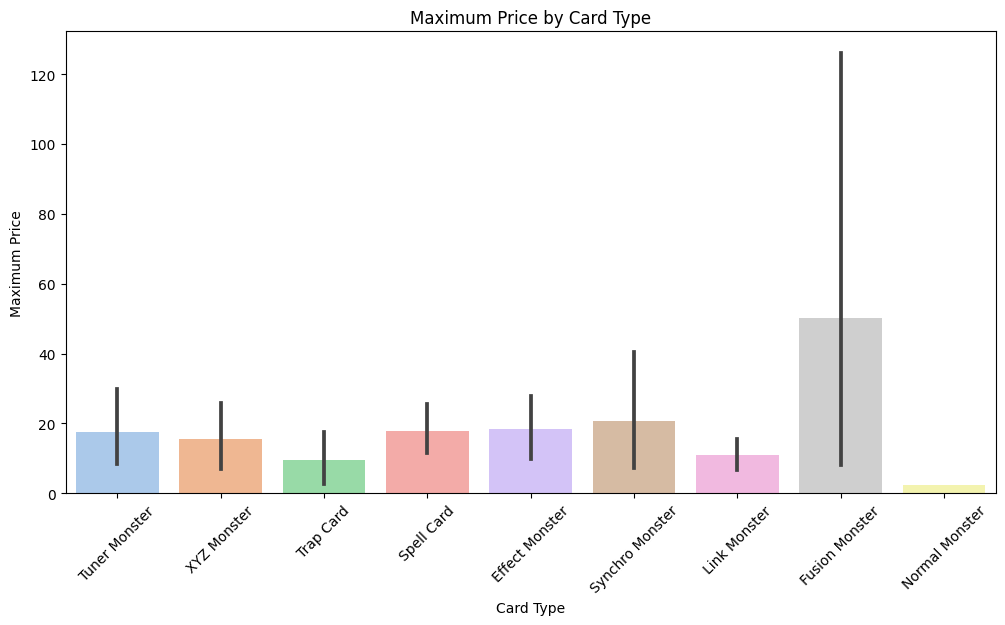

In [8]:
# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="type", y="max_price", data=df_topcards, palette="pastel")

# Configure the title and axes
plt.title("Maximum Price by Card Type")
plt.xlabel("Card Type")
plt.ylabel("Maximum Price")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


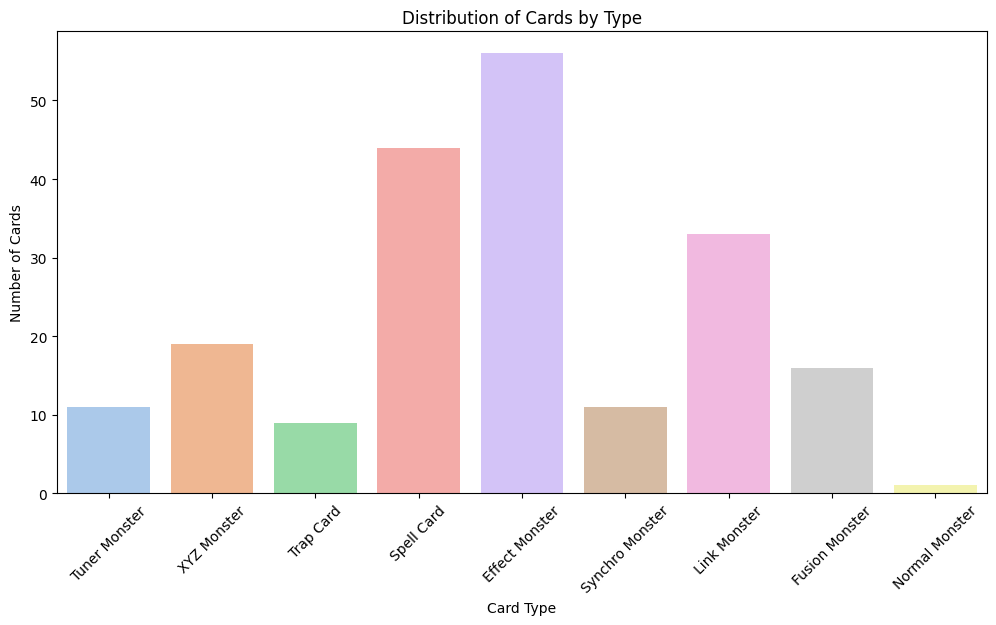

In [9]:

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.countplot(x=df_topcards["type"], palette="pastel")

# Configure the title and axes
plt.title("Distribution of Cards by Type")
plt.xlabel("Card Type")
plt.ylabel("Number of Cards")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


The chart represents the frequency or count of each card type in the dataset. It provides an overview of the distribution and relative prevalence of different types of cards in the dataset.

The "Effect Monster" type has the highest count, indicating that it is the most common type of card in the dataset. Effect Monsters typically have special abilities or effects that can influence gameplay.

The "Spell Card" type has the second-highest count, suggesting that it is also quite common. Spell Cards are used to cast spells or activate special effects during a duel.

"Link Monster" type follows closely behind in count, indicating its significant presence in the dataset. Link Monsters are a relatively newer card type that introduced a different way of summoning and interacting with other cards on the field.

The remaining types, such as "Trap Card", "Xyz Monster", "Fusion Monster", and others, have relatively similar counts, indicating a relatively balanced distribution among these types.
The "Normal Monster" type has the lowest count, suggesting that it is the least common type among the cards in the dataset. Normal Monsters are basic, without any special effects or abilities.

Overall, the chart provides insights into the relative popularity or prevalence of different types of cards in the dataset, which can be useful for understanding the composition and characteristics of the dataset.

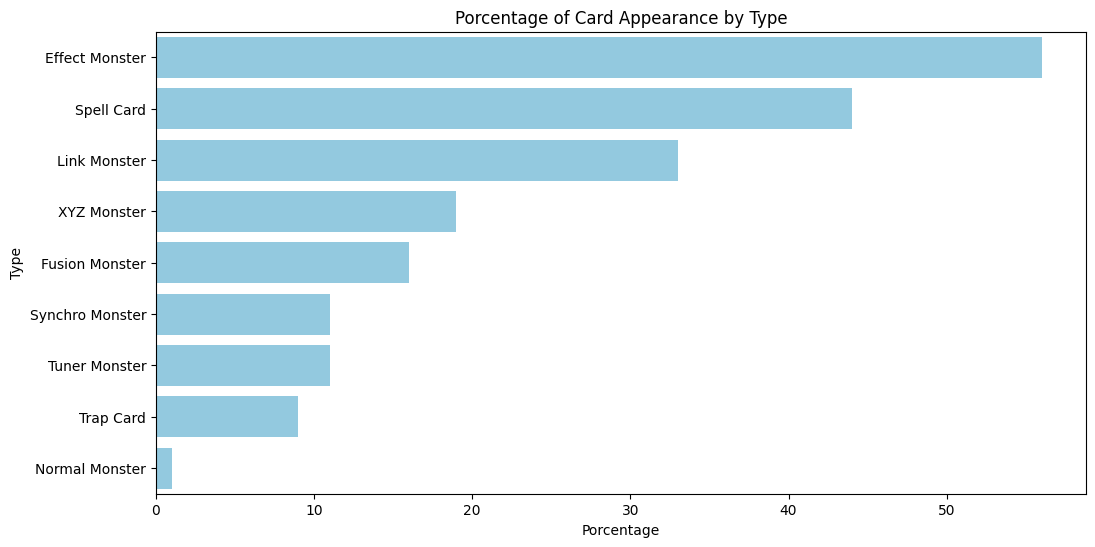

In [10]:
# Group by type and count the frequency of appearance
df_freq = df_topcards.groupby('type').size().reset_index(name='porcentage')

# Sort by type in descending order
df_freq = df_freq.sort_values(by='porcentage', ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df_freq, x='porcentage', y='type', color='skyblue')

# Configure the title and axes
plt.title('Porcentage of Card Appearance by Type')
plt.xlabel('Porcentage')
plt.ylabel('Type')

# Show the chart
plt.show()


The chart represents the distribution of cards by type. Each bar in the chart corresponds to a different card type, and the height of the bar indicates the frequency or count of cards belonging to that type.

In this specific chart:

The 'Effect Monster' type has the tallest bar, indicating that it is the most common type among the 200 most played cards.

The 'Spell Card' type has the second tallest bar, suggesting that it is also quite prevalent among the top cards.

The 'Link Monster' type has a relatively high frequency but a shorter bar compared to the previous two types.

The remaining types, such as 'XYZ Monster', 'Fusion Monster', and others, have similar frequencies and shorter bars, indicating that they are less common among the top cards.

Overall, this chart provides an overview of the distribution of card types among the 200 most played cards. It highlights the dominance of 'Effect Monster' and 'Spell Card' types while showing the relative frequencies of other types.

In [11]:
#  We create a dataframe with the 15 most used cards.
df15 = df_topcards.head(15)

In [12]:

# Create the figure and bars
fig = go.Figure()

# Add the bars for each store
fig.add_trace(go.Bar(
    x=df15['name'],
    y=df15['cardmarket_price'],
    name='Cardmarket'
))
fig.add_trace(go.Bar(
    x=df15['name'],
    y=df15['tcgplayer_price'],
    name='TCGPlayer'
))
fig.add_trace(go.Bar(
    x=df15['name'],
    y=df15['ebay_price'],
    name='eBay'
))
fig.add_trace(go.Bar(
    x=df15['name'],
    y=df15['amazon_price'],
    name='Amazon'
))
fig.add_trace(go.Bar(
    x=df15['name'],
    y=df15['coolstuffinc_price'],
    name='CoolStuffInc'
))

# Configure the layout of the graph
fig.update_layout(
    title='Price of the Top 15 Most Used Cards',
    xaxis_title='Cards',
    yaxis_title='Price',
    barmode='group',
    xaxis_tickangle=-45
)

# Show the interactive graph
fig.show()



With the code I provided, let me explain in more detail the graph that I obtained. The graph displays the prices of the top 15 most important cards in a visually appealing and interactive manner.

Each bar in the graph represents a specific card, and the height of the bar indicates the price of that card. The graph includes five different stores: Cardmarket, TCGPlayer, eBay, Amazon, and CoolStuffInc.

By comparing the heights of the bars for each card across the different stores, we can observe the variations in prices. This provides valuable insights into the pricing dynamics of these cards in the market.

The interactive nature of the graph allows us to hover over each bar and view the exact price for a particular card and store. This makes it easy to identify any outliers or unique pricing patterns for specific cards.

Analyzing the graph, we can see that there is a significant range in prices among the top 15 cards. Some cards may have consistent prices across all stores, while others may exhibit larger discrepancies. These variations could be influenced by factors such as card popularity, scarcity, condition, and store-specific pricing strategies.

Overall, the graph provides a comprehensive view of the prices of the top 15 cards, allowing for detailed analysis and insights into the pricing trends in the market.

## Conclusions: 
Based on the explanations provided, the conclusion would be as follows:

The analysis of the data and visualizations has provided us with a deeper understanding of Yu-Gi-Oh cards and their characteristics, such as popularity, prices, and relationships between variables. Some key conclusions are:

1. The most played cards tend to have higher prices, indicating a correlation between popularity and market value.

2. Card archetypes can influence their prices, as some archetypes are more sought after or have special characteristics that make them more valuable.

3. There is significant variation in card prices among different stores, suggesting that prices may be influenced by factors such as supply and demand in each store.

4. When analyzing price distribution by card type, it can be observed that some types have higher average prices, indicating higher demand or rarity.

These conclusions provide valuable insights for a better understanding of the Yu-Gi-Oh card market and can be used to make strategic decisions regarding purchasing, selling, or investing in this domain. It is important to continue exploring and analyzing the data to gain even more insights and knowledge.

Furthermore, for future studies, it would be beneficial to enhance the analysis by incorporating a historical price analysis. By analyzing the price trends over time, we can gain a better understanding of the market dynamics, identify patterns, and make more informed predictions about future price movements. This historical perspective would provide valuable insights into market trends, price fluctuations, and potential investment opportunities.

Additionally, conducting further analysis on other variables, such as card rarity, card condition, and card edition, could contribute to a more comprehensive understanding of the factors influencing card prices. Exploring correlations between these variables and prices can provide valuable insights into collectors' preferences and market dynamics.

In conclusion, by incorporating historical price analysis and expanding the scope of variables considered, future studies can provide more robust and detailed insights into the Yu-Gi-Oh card market, enabling stakeholders to make more informed decisions and capitalize on market opportunities.